# Proyecto II – Simulación Numérica del Atractor de Lorenz

## Introducción General

En el presente proyecto se abordará la simulación numérica del **atractor de Lorenz**, un sistema de ecuaciones diferenciales ordinarias (EDOs) de naturaleza no lineal que presenta comportamiento caótico. El objetivo es implementar desde cero dos métodos numéricos fundamentales para la resolución de sistemas dinámicos de primer orden:

- El **método de Euler**, por su sencillez computacional.
- El **método de Runge-Kutta de cuarto orden (RK4)**, reconocido por su precisión.

Ambos algoritmos serán utilizados para aproximar soluciones del sistema de Lorenz bajo distintas condiciones iniciales y parámetros, lo que permitirá observar y analizar el impacto de pequeñas variaciones en el comportamiento del sistema.

El sistema fue propuesto por **Edward Lorenz** en 1963 como un modelo simplificado de convección atmosférica. Su relevancia se debe a que constituye uno de los primeros ejemplos documentados de un sistema determinista caótico, donde mínimas perturbaciones en las condiciones iniciales provocan trayectorias divergentes a lo largo del tiempo, fenómeno conocido como el **efecto mariposa** [1].

El sistema está definido por el siguiente conjunto de ecuaciones diferenciales ordinarias:

$$
\begin{cases}
\dot{x} = \sigma (y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}
$$

donde $\sigma$, $\rho$ y $\beta$ son parámetros positivos que caracterizan el sistema, y las variables $x(t)$, $y(t)$ y $z(t)$ representan funciones del tiempo.

Dado que no existe una solución analítica general para este sistema, será necesario utilizar métodos numéricos implementados manualmente en **Python**. Toda la lógica será construida desde cero utilizando únicamente herramientas como **NumPy** y **Matplotlib**.

---



# Sistema de Lorenz - Simulaciones

## 1. Definición del sistema de Lorenz

El sistema de Lorenz es un conjunto de ecuaciones diferenciales ordinarias no lineales de primer orden, derivado originalmente de un modelo simplificado para estudiar la convección térmica en la atmósfera. Fue propuesto por Edward Lorenz en 1963 y es conocido por su comportamiento caótico bajo ciertas condiciones iniciales y valores de parámetros [1].

Este sistema modela la evolución temporal de tres variables interdependientes, usualmente representadas como $x(t)$, $y(t)$ y $z(t)$, de acuerdo con el siguiente sistema:

$$
\begin{cases}
\dot{x} = \sigma (y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}
$$

Donde:

- $\sigma$: número de Prandtl (relación entre difusión térmica y viscosidad),
- $\rho$: número de Rayleigh modificado (proporcional a la diferencia de temperatura),
- $\beta$: parámetro geométrico.

Cada una de estas ecuaciones describe la tasa de cambio de una variable con respecto al tiempo. El sistema puede escribirse de forma compacta como:

$$
\frac{d\vec{x}}{dt} = \vec{F}(\vec{x}, t)
$$

donde $\vec{x}(t) = [x(t), y(t), z(t)]^\top$ es el vector de estado y $\vec{F} = [\dot{x}, \dot{y}, \dot{z}]$ representa el **campo vectorial** que define la dinámica del sistema. Esta notación permite interpretar el comportamiento del sistema desde una perspectiva geométrica, facilitando el análisis de propiedades como la **divergencia** y el **rotacional**, fundamentales en el estudio de sistemas dinámicos tridimensionales [2].

A continuación, se implementa en Python una función que representa el sistema de Lorenz como un campo vectorial a partir de sus ecuaciones definidas.


In [1]:
import numpy as np

def lorenz_system(state, sigma, rho, beta):
    """
    Representación del sistema de Lorenz como campo vectorial.

    Parámetros:
    - state: vector de estado [x, y, z] en el tiempo actual.
    - sigma, rho, beta: parámetros del sistema de Lorenz.

    Retorna:
    - derivada: vector [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])


## 2. Implementación del Método de Euler

El **método de Euler** es uno de los algoritmos más simples para resolver numéricamente ecuaciones diferenciales ordinarias (EDOs). Consiste en aproximar la solución de una EDO de primer orden utilizando una expansión de **Taylor de primer grado** [3].

Sea una EDO en forma vectorial:

$$
\frac{d\vec{x}}{dt} = \vec{F}(\vec{x}, t), \quad \vec{x}(t_0) = \vec{x}_0
$$

donde $\vec{x}(t)$ representa el vector de estado del sistema en el instante $t$, y $\vec{F}$ es una función que describe su dinámica.

La idea principal del método es utilizar el valor actual de la derivada para proyectar la solución hacia adelante en el tiempo. Si se desea calcular una aproximación en el instante $t_{n+1} = t_n + h$, se emplea la expansión de Taylor:

$$
\vec{x}(t_{n+1}) = \vec{x}(t_n) + h \cdot \frac{d\vec{x}}{dt}(t_n) + \mathcal{O}(h^2)
$$

Despreciando el término de orden superior $\mathcal{O}(h^2)$, se obtiene la **fórmula de Euler**:

$$
\vec{x}_{n+1} = \vec{x}_n + h \cdot \vec{F}(\vec{x}_n, t_n)
$$

donde:
- $\vec{x}_n$ es la aproximación de la solución en el instante $t_n$,
- $h$ es el tamaño del paso temporal.

Este procedimiento se repite de forma iterativa para obtener la trayectoria aproximada del sistema entre un tiempo inicial $t_0$ y uno final $t_f$. La calidad de la solución depende fuertemente del tamaño del paso $h$: valores grandes pueden generar errores significativos, mientras que pasos pequeños aumentan la precisión a costa de mayor tiempo de cómputo.

### Aplicación al sistema de Lorenz

El sistema de Lorenz, al ser un sistema tridimensional de EDOs no lineales, se adapta directamente al esquema anterior. En este caso, el vector $\vec{x}$ corresponde a:

$$
\vec{x}(t) = [x(t),\; y(t),\; z(t)]^\top
$$

y el campo vectorial $\vec{F}$ está definido por las ecuaciones:

$$
\vec{F}(\vec{x}) =
\begin{bmatrix}
\sigma (y - x) \\
x (\rho - z) - y \\
xy - \beta z
\end{bmatrix}
$$

A continuación, se presenta la implementación computacional del método de Euler para sistemas de EDOs de este tipo, de forma general y reutilizable.


In [2]:
def euler_method(f, x0, t0, tf, h, args=()):
    """
    Implementación del método de Euler para sistemas de EDOs.

    Parámetros:
    - f: función que define el sistema (e.g., lorenz_system)
    - x0: vector de condiciones iniciales [x0, y0, z0]
    - t0: tiempo inicial
    - tf: tiempo final
    - h: paso de integración
    - args: tupla de parámetros adicionales para el sistema (e.g., sigma, rho, beta)

    Retorna:
    - t_values: arreglo de tiempos
    - x_values: arreglo de soluciones aproximadas en cada paso
    """
    num_steps = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, num_steps + 1)
    x_values = np.zeros((num_steps + 1, len(x0)))
    x_values[0] = x0

    for i in range(num_steps):
        x_values[i + 1] = x_values[i] + h * f(x_values[i], *args)

    return t_values, x_values


## 3. Implementación del Método de Runge-Kutta de Cuarto Orden (RK4)

El **método de Runge-Kutta de cuarto orden (RK4)** es uno de los algoritmos más utilizados para la resolución numérica de ecuaciones diferenciales ordinarias debido a su buen equilibrio entre **precisión** y **eficiencia computacional**. A diferencia del método de Euler, que utiliza una única evaluación del campo vectorial $\vec{F}$ por paso, RK4 realiza **cuatro evaluaciones por paso**, combinándolas ponderadamente para obtener una estimación más precisa del siguiente valor [4].

Para un sistema de EDOs expresado en forma general:

$$
\frac{d\vec{x}}{dt} = \vec{F}(\vec{x}, t), \quad \vec{x}(t_0) = \vec{x}_0
$$

el método RK4 avanza desde $\vec{x}_n$ hasta $\vec{x}_{n+1}$ usando las siguientes fórmulas:

\begin{aligned}
k_1 &= \vec{F}(\vec{x}_n, t_n) \\
k_2 &= \vec{F}\left(\vec{x}_n + \frac{h}{2}k_1,\; t_n + \frac{h}{2}\right) \\
k_3 &= \vec{F}\left(\vec{x}_n + \frac{h}{2}k_2,\; t_n + \frac{h}{2}\right) \\
k_4 &= \vec{F}\left(\vec{x}_n + h \cdot k_3,\; t_n + h\right) \\
\vec{x}_{n+1} &= \vec{x}_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}

Donde:
- $h$ es el tamaño del paso temporal,
- $k_1$, $k_2$, $k_3$, $k_4$ son **estimaciones intermedias** de la derivada.

El método RK4 logra un **error local de orden $h^5$** y un **error global de orden $h^4$**, lo que significa que es mucho más preciso que Euler (orden 1) al mismo tamaño de paso. Esta característica lo hace especialmente adecuado para sistemas con comportamientos caóticos o sensibles, como el atractor de Lorenz.

### Aplicación al sistema de Lorenz

El sistema de Lorenz puede resolverse numéricamente utilizando este método, aplicando el vector de estado $\vec{x} = [x, y, z]^\top$ y el campo vectorial no lineal previamente definido. El uso de RK4 permite capturar con mayor fidelidad las trayectorias del sistema, evitando errores acumulados y oscilaciones artificiales producidas por métodos de menor orden.

A continuación se implementa la versión general del método RK4 para sistemas tridimensionales como el de Lorenz.

In [3]:
def runge_kutta_4(f, x0, t0, tf, h, args=()):
    """
    Implementación del método de Runge-Kutta de cuarto orden (RK4) para sistemas de EDOs.

    Parámetros:
    - f: función que define el sistema (e.g., lorenz_system)
    - x0: vector de condiciones iniciales [x0, y0, z0]
    - t0: tiempo inicial
    - tf: tiempo final
    - h: paso de integración
    - args: tupla de parámetros adicionales para el sistema (e.g., sigma, rho, beta)

    Retorna:
    - t_values: arreglo de tiempos
    - x_values: arreglo de soluciones aproximadas en cada paso
    """
    num_steps = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, num_steps + 1)
    x_values = np.zeros((num_steps + 1, len(x0)))
    x_values[0] = x0

    for i in range(num_steps):
        t = t_values[i]
        x = x_values[i]

        k1 = f(x, *args)
        k2 = f(x + 0.5 * h * k1, *args)
        k3 = f(x + 0.5 * h * k2, *args)
        k4 = f(x + h * k3, *args)

        x_values[i + 1] = x + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return t_values, x_values


## 4. Parámetros y condiciones iniciales

El comportamiento del sistema de Lorenz depende fuertemente tanto de los **parámetros físicos** que definen su dinámica como de las **condiciones iniciales** desde donde parte la solución. Este fenómeno se conoce como **sensibilidad a condiciones iniciales**, una característica clave de los sistemas caóticos.

Los tres parámetros que definen el sistema son:

- $\sigma$ (sigma): número de Prandtl.
- $\rho$ (rho): número de Rayleigh modificado.
- $\beta$ (beta): parámetro geométrico.

A continuación se presentan tres configuraciones distintas solicitadas en el proyecto, que serán utilizadas para realizar las simulaciones numéricas con los métodos de Euler y Runge-Kutta (RK4):

| Caso | $\rho$ | $\sigma$ | $\beta$ | $x_0$     | $y_0$   | $z_0$   |
|------|--------|----------|---------|-----------|---------|---------|
| 1    | 28     | 10       | 8/3     | 1.0       | 1.0     | 1.0     |
| 2    | 28     | 10       | 8/3     | 1.002025  | 0.2     | 0.4     |
| 3    | 18     | 9        | 10/3    | 2.0       | 0.009   | 0.7     |

### Justificación de los casos seleccionados

- **Caso 1**: Representa una condición de referencia clásica del atractor de Lorenz con parámetros caóticos bien documentados en la literatura [5].
- **Caso 2**: Introduce una leve variación en las condiciones iniciales respecto al caso 1. Se utilizará para observar el **efecto mariposa**, es decir, cómo una mínima diferencia inicial puede conducir a trayectorias completamente distintas [1].
- **Caso 3**: Utiliza valores distintos de los parámetros físicos del sistema. Este caso permitirá analizar cómo la modificación de $\rho$, $\sigma$ y $\beta$ afecta el comportamiento del sistema dinámico, permitiendo estudiar **bifurcaciones** y cambios en la geometría del atractor.

Estos conjuntos de parámetros serán empleados de forma consistente en las simulaciones posteriores con ambos métodos numéricos.

In [4]:
# Definición de los 3 conjuntos de condiciones iniciales y parámetros
simulation_cases = {
    "Caso 1": {
        "params": {"rho": 28, "sigma": 10, "beta": 8/3},
        "initial_state": np.array([1.0, 1.0, 1.0])
    },
    "Caso 2": {
        "params": {"rho": 28, "sigma": 10, "beta": 8/3},
        "initial_state": np.array([1.002025, 0.2, 0.4])
    },
    "Caso 3": {
        "params": {"rho": 18, "sigma": 9, "beta": 10/3},
        "initial_state": np.array([2.0, 0.009, 0.7])
    }
}

# Mostrar resumen de parámetros por caso
for name, case in simulation_cases.items():
    print(f"{name}:")
    print(f"  Parámetros: ρ={case['params']['rho']}, σ={case['params']['sigma']}, β={case['params']['beta']}")
    print(f"  Condición inicial: x0={case['initial_state']}")
    print()


Caso 1:
  Parámetros: ρ=28, σ=10, β=2.6666666666666665
  Condición inicial: x0=[1. 1. 1.]

Caso 2:
  Parámetros: ρ=28, σ=10, β=2.6666666666666665
  Condición inicial: x0=[1.002025 0.2      0.4     ]

Caso 3:
  Parámetros: ρ=18, σ=9, β=3.3333333333333335
  Condición inicial: x0=[2.    0.009 0.7  ]



## 5. Simulación del sistema con el Método de Euler

Una vez implementado el método de Euler, se procede a aplicarlo para aproximar las soluciones del sistema de Lorenz bajo las tres configuraciones de parámetros y condiciones iniciales definidas anteriormente.

El objetivo de esta sección es visualizar el comportamiento dinámico del sistema a lo largo del tiempo y observar cómo la elección de condiciones iniciales y parámetros afecta la evolución de las variables $x(t)$, $y(t)$ y $z(t)$.

### Configuración del experimento numérico

Para las simulaciones se utilizarán los siguientes valores:

- Intervalo de tiempo: $[0, 40]$ unidades.
- Paso de integración: $h = 0.01$.

La elección del intervalo de tiempo se basa en la necesidad de capturar una evolución significativa del sistema. Dado que el atractor de Lorenz presenta una dinámica compleja y caótica, una simulación de corto plazo podría no evidenciar las características globales del sistema. Un horizonte de 40 unidades de tiempo permite observar múltiples oscilaciones, bifurcaciones y cambios de rumbo en la trayectoria de las soluciones.

Respecto al tamaño de paso $h$, se ha elegido un valor relativamente pequeño ($0.01$) para mitigar el efecto de acumulación de error, ya que el método de Euler posee un **error global de orden $\mathcal{O}(h)$**. En particular, se ha evitado utilizar valores grandes como $h = 0.1$ o $h = 0.05$ que podrían llevar a inestabilidad numérica o divergencia en este tipo de sistemas no lineales y caóticos [3].

### Visualización temporal de variables

Para cada caso se graficarán las siguientes variables en función del tiempo:

- $x(t)$: velocidad de convección horizontal.
- $y(t)$: temperatura horizontal.
- $z(t)$: temperatura vertical.

Estas curvas permiten analizar la evolución individual de cada componente del sistema.

### Visualización tridimensional del atractor de Lorenz

Además de las gráficas por variable en función del tiempo, es común representar la trayectoria del sistema en el **espacio de fase tridimensional**, es decir, graficar directamente el conjunto de puntos $(x(t), y(t), z(t))$ para $t \in [0, 40]$.

Esta representación permite observar la **estructura global del atractor**, donde las trayectorias parecen girar en torno a dos lóbulos sin llegar a cruzarse. Esta figura característica es una de las principales evidencias del comportamiento caótico del sistema de Lorenz [5].


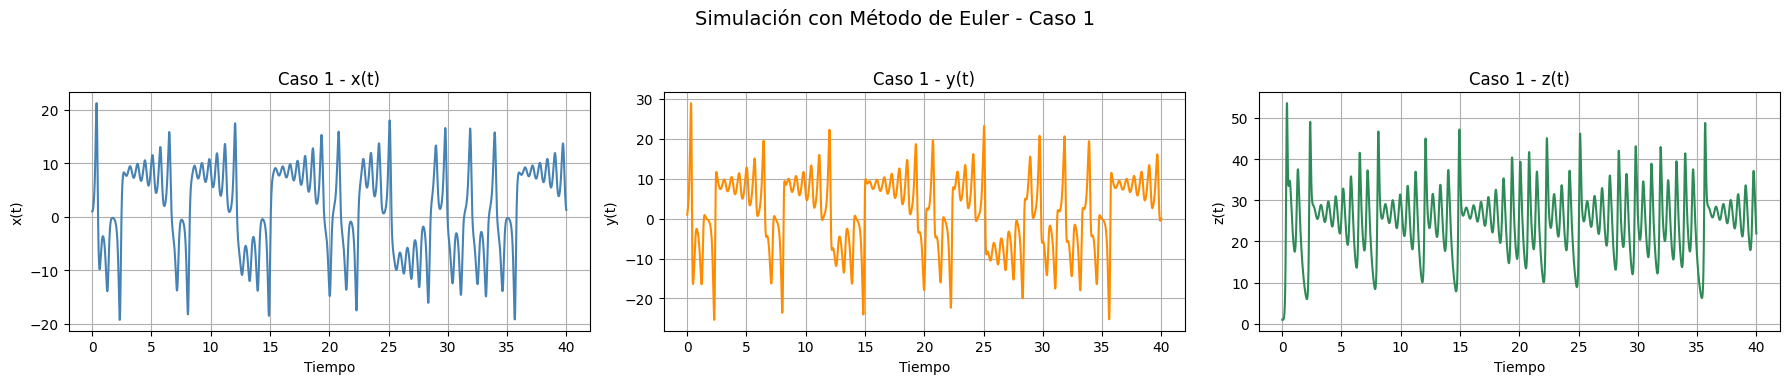

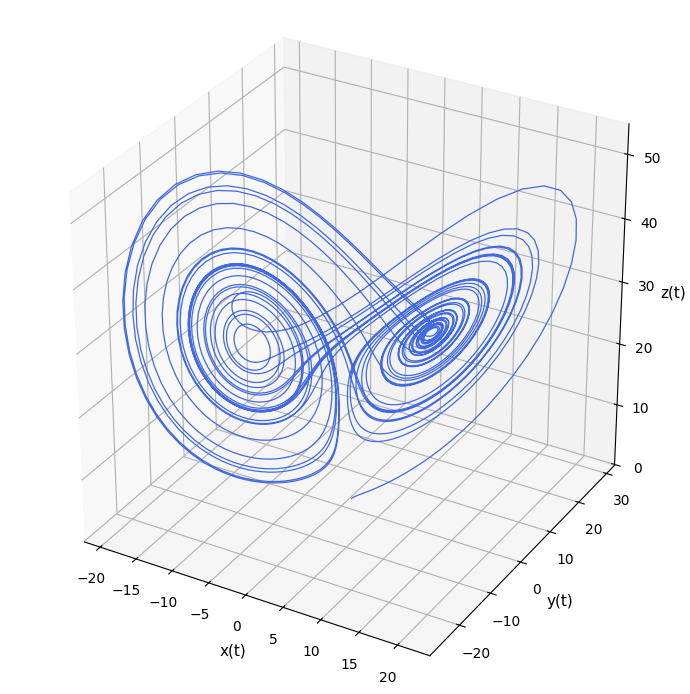

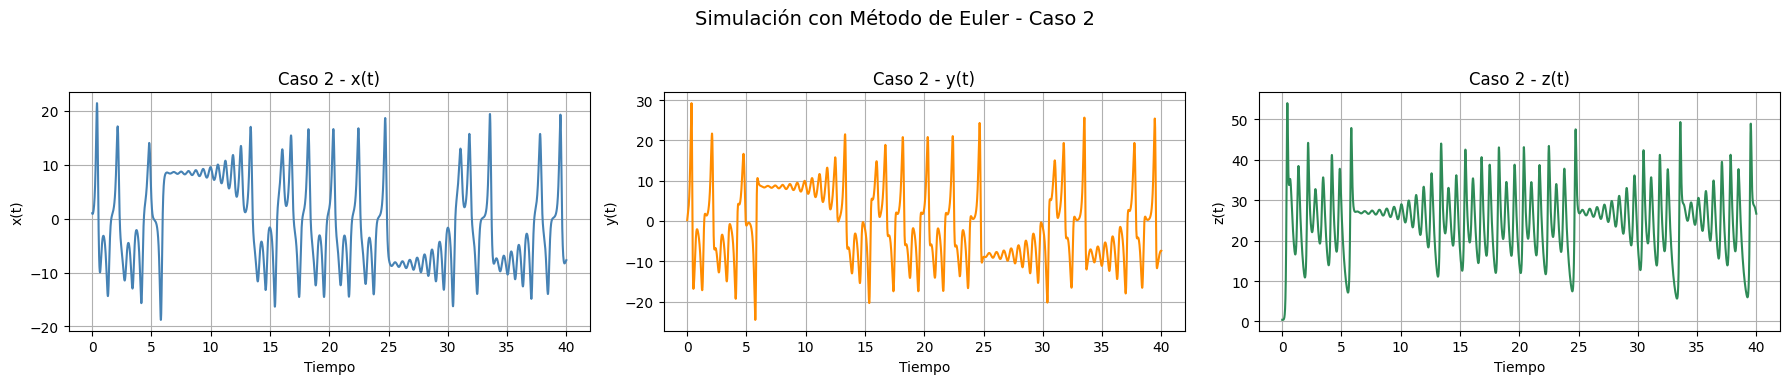

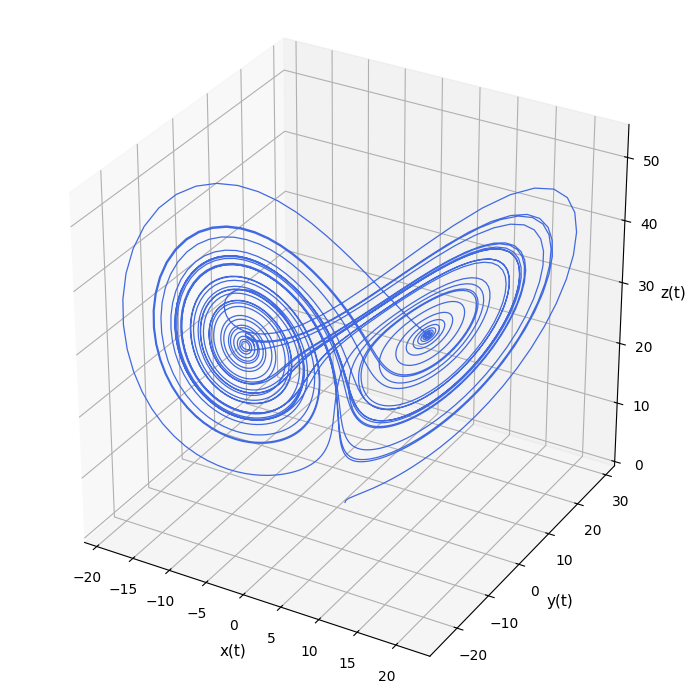

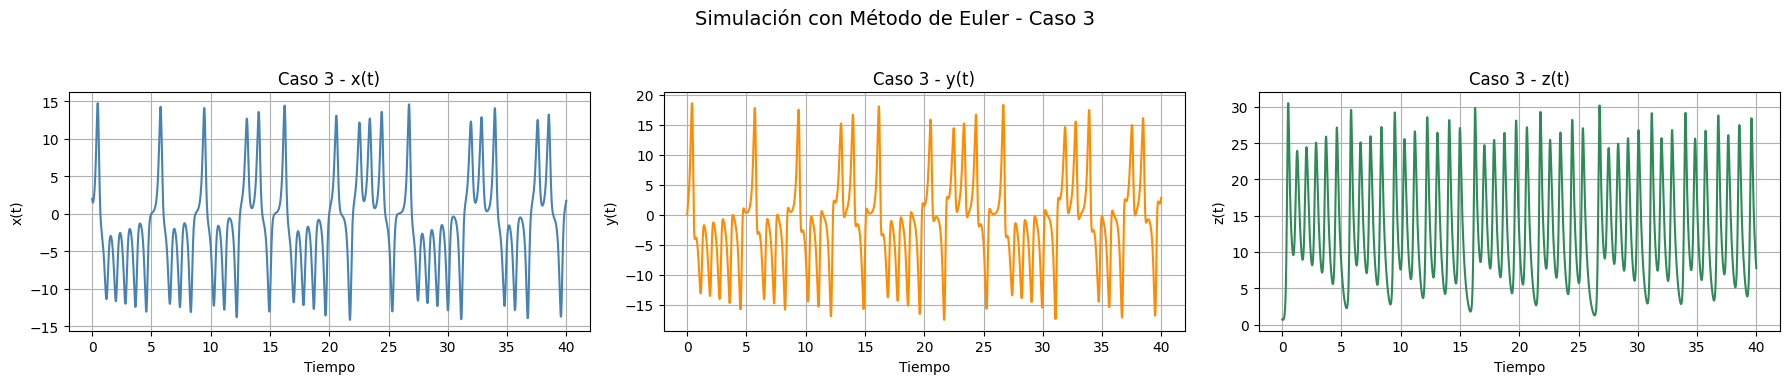

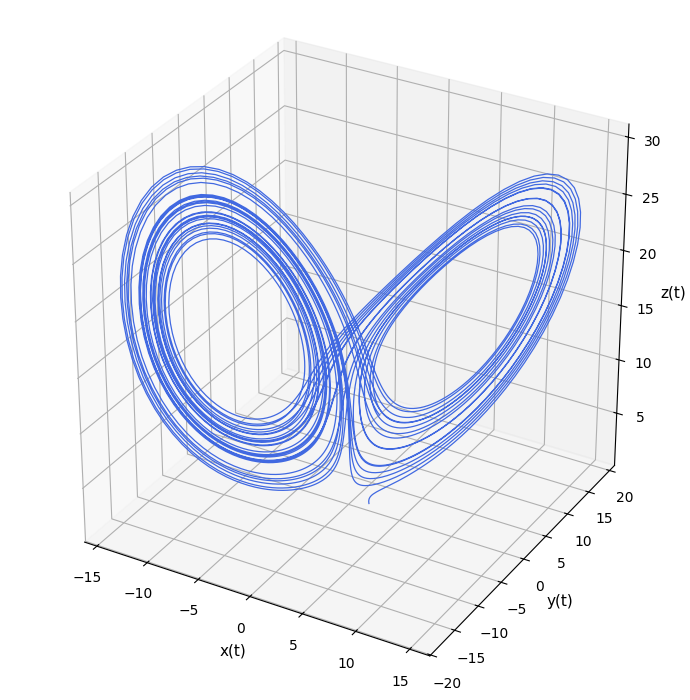

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros de simulación
t0 = 0
tf = 40
h = 0.01

# Función para graficar resultados temporales (Euler)
def plot_euler_time_series(t, results, case_name):
    x, y, z = results[:, 0], results[:, 1], results[:, 2]

    fig, axs = plt.subplots(1, 3, figsize=(18, 4))

    axs[0].plot(t, x, color='steelblue')
    axs[0].set_title(f'{case_name} - x(t)')
    axs[0].set_xlabel('Tiempo')
    axs[0].set_ylabel('x(t)')
    axs[0].grid()

    axs[1].plot(t, y, color='darkorange')
    axs[1].set_title(f'{case_name} - y(t)')
    axs[1].set_xlabel('Tiempo')
    axs[1].set_ylabel('y(t)')
    axs[1].grid()

    axs[2].plot(t, z, color='seagreen')
    axs[2].set_title(f'{case_name} - z(t)')
    axs[2].set_xlabel('Tiempo')
    axs[2].set_ylabel('z(t)')
    axs[2].grid()

    fig.suptitle(f'Simulación con Método de Euler - {case_name}', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Función para graficar atractor 3D con (Euler)
def plot_euler_3d(x_values, case_name):
    x, y, z = x_values[:, 0], x_values[:, 1], x_values[:, 2]

    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x, y, z, lw=0.9, color='royalblue')

    # Etiquetas
    ax.set_xlabel("x(t)", fontsize=11)
    ax.set_ylabel("y(t)", fontsize=11)
    ax.set_zlabel("z(t)", fontsize=11)

    ax.tick_params(labelsize=10)
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)

    plt.tight_layout()
    plt.show()


# Simulación y visualización por cada caso
for case_name, case in simulation_cases.items():    
    params = case["params"]
    x0 = case["initial_state"]

    t_euler, sol_euler = euler_method(
        lorenz_system,
        x0=x0,
        t0=t0,
        tf=tf,
        h=h,
        args=(params["sigma"], params["rho"], params["beta"])
    )

    plot_euler_time_series(t_euler, sol_euler, case_name)
    plot_euler_3d(sol_euler, case_name)


### Interpretación de resultados

Los resultados obtenidos con el método de Euler muestran trayectorias oscilatorias en las variables $x(t)$, $y(t)$ y $z(t)$, lo cual es esperable en sistemas no lineales como el de Lorenz. Sin embargo, se evidencian diversas limitaciones numéricas asociadas al uso de este método.

En los **Casos 1 y 2**, se observa un comportamiento caótico aparente, donde las trayectorias alternan de manera irregular entre los lóbulos del atractor. Esta dinámica reproduce parcialmente el patrón clásico del sistema, aunque con una forma 3D algo dispersa y menos definida, lo que indica una acumulación de errores numéricos propios del método [3].

En el **Caso 3**, el método de Euler produce un comportamiento claramente erróneo: genera oscilaciones persistentes y una figura caótica en el espacio de fase, cuando en realidad —por las condiciones del sistema— se espera una convergencia hacia un estado estacionario [5]. Esta "falsa dinámica caótica" es consecuencia del bajo orden del método y de su error global acumulativo $\mathcal{O}(h)$, que tiende a distorsionar la realidad matemática del sistema [3].

## 6. Simulación del sistema con el Método de Runge-Kutta (RK4)

En esta sección se resolverá el sistema de Lorenz utilizando el **método de Runge-Kutta de cuarto orden (RK4)**. Este método es ampliamente utilizado por su **alta precisión**, ya que posee un **error global de orden $\mathcal{O}(h^4)$**, lo cual representa una mejora significativa en comparación con el método de Euler.

RK4 permite capturar con mayor fidelidad las trayectorias del sistema, incluso ante dinámicas caóticas como las del atractor de Lorenz, sin requerir pasos excesivamente pequeños.

### Configuración experimental

Se utilizarán las mismas condiciones numéricas empleadas con el método de Euler para poder comparar resultados de forma directa:

- Intervalo de tiempo: $[0, 40]$ unidades.
- Paso de integración: $h = 0.01$.
- Tres conjuntos de condiciones iniciales y parámetros definidos anteriormente.

Esto permitirá comparar la estabilidad, fidelidad y suavidad de las trayectorias entre ambos métodos.

### Visualización temporal de variables

Al igual que en el método anterior, se graficarán las variables $x(t)$, $y(t)$ y $z(t)$ por separado para cada caso, lo cual permitirá:

- Verificar el efecto del método sobre la estabilidad numérica.
- Comparar suavidad de curvas respecto a Euler.
- Evaluar si hay divergencias en el tiempo.

### Visualización tridimensional del atractor de Lorenz

De igual manera se presenta la trayectoria tridimensional generada por el método de Runge-Kutta para cada uno de los casos. Esta gráfica en el espacio de fase $(x, y, z)$ permite apreciar con claridad la estructura del atractor de Lorenz.

El método RK4 tiende a producir trayectorias más suaves, con curvas más definidas y menor distorsión, lo cual es especialmente importante para visualizar geometrías caóticas como las del sistema Lorenz [4].

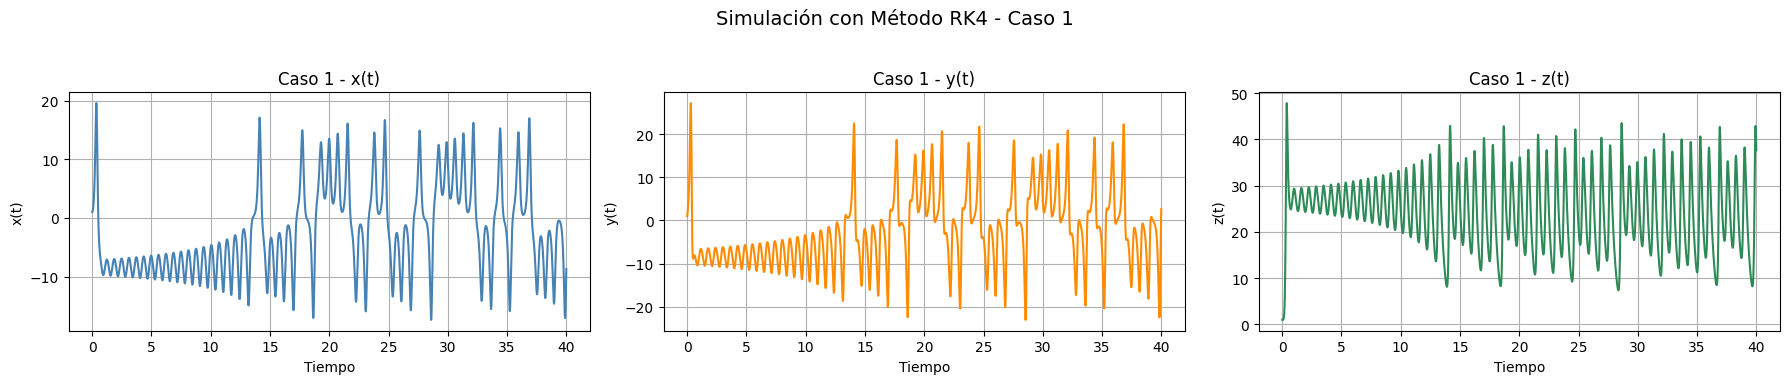

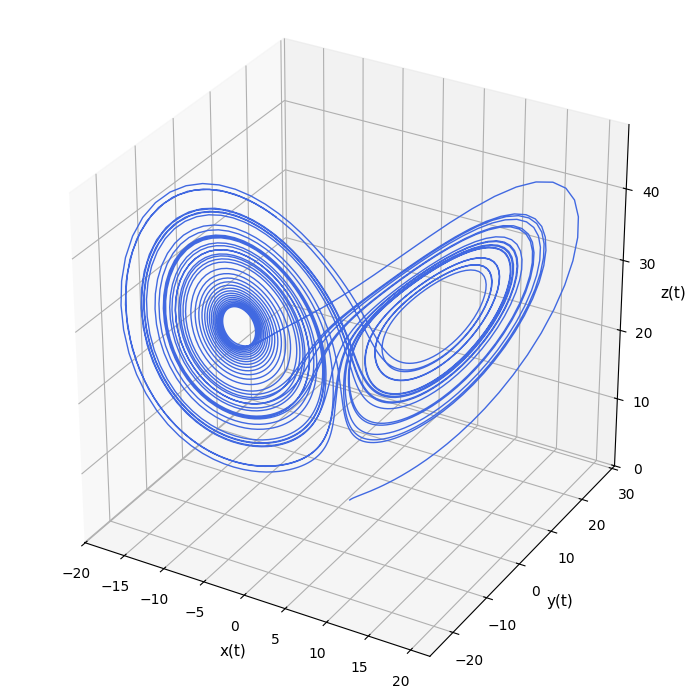

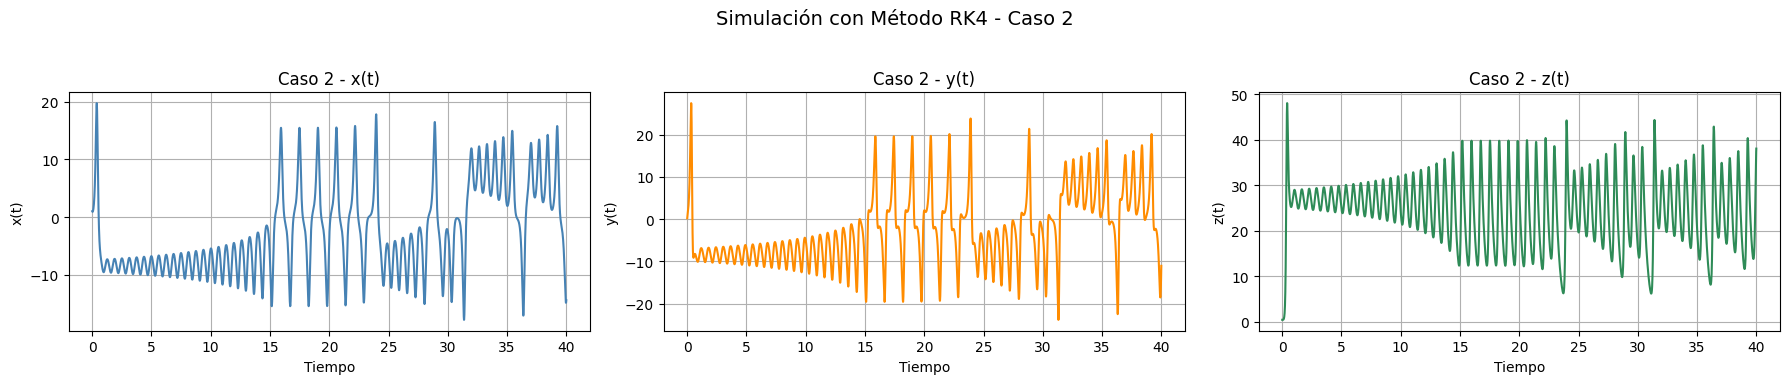

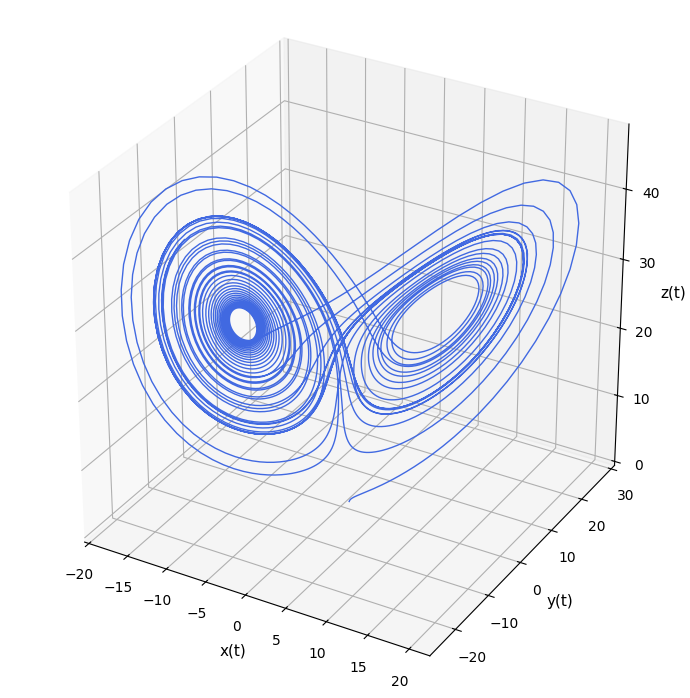

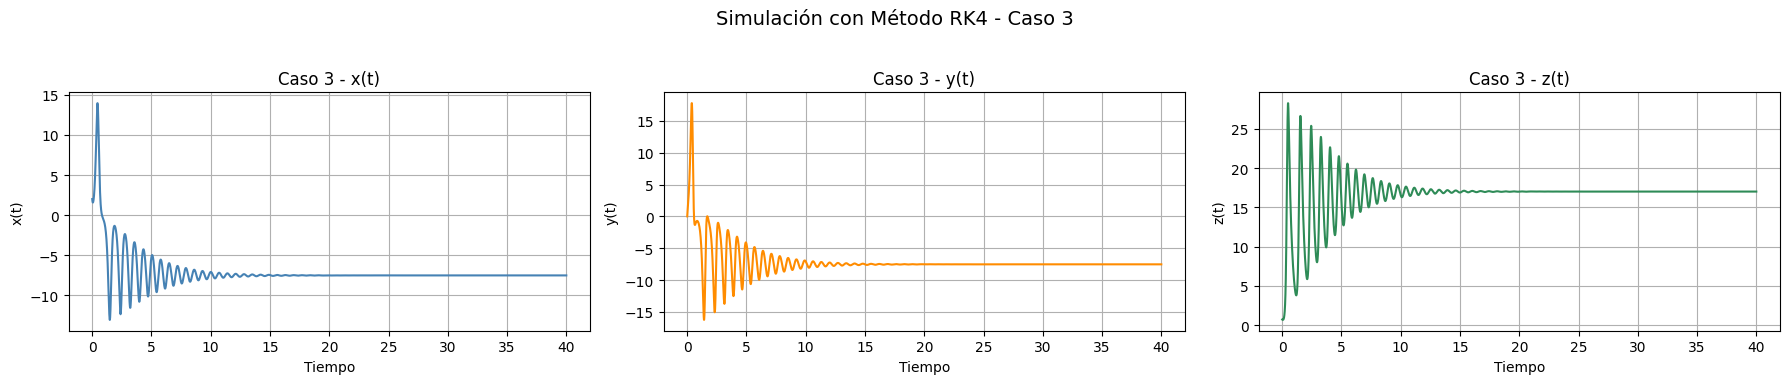

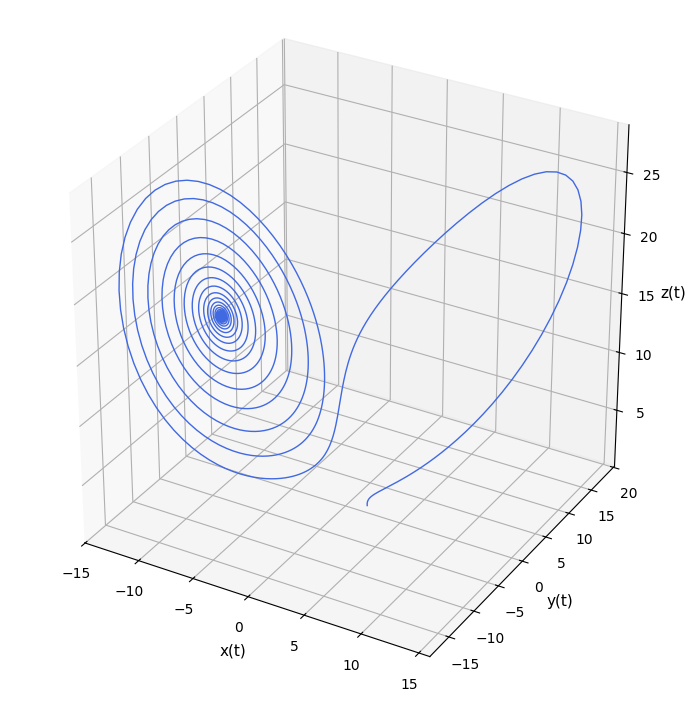

In [6]:
# Función para graficar resultados temporales (RK4)
def plot_rk4_time_series(t, results, case_name):
    x, y, z = results[:, 0], results[:, 1], results[:, 2]

    fig, axs = plt.subplots(1, 3, figsize=(18, 4))

    axs[0].plot(t, x, color='steelblue')
    axs[0].set_title(f'{case_name} - x(t)')
    axs[0].set_xlabel('Tiempo')
    axs[0].set_ylabel('x(t)')
    axs[0].grid()

    axs[1].plot(t, y, color='darkorange')
    axs[1].set_title(f'{case_name} - y(t)')
    axs[1].set_xlabel('Tiempo')
    axs[1].set_ylabel('y(t)')
    axs[1].grid()

    axs[2].plot(t, z, color='seagreen')
    axs[2].set_title(f'{case_name} - z(t)')
    axs[2].set_xlabel('Tiempo')
    axs[2].set_ylabel('z(t)')
    axs[2].grid()

    fig.suptitle(f'Simulación con Método RK4 - {case_name}', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Función para graficar atractor 3D con (RK4)
def plot_rk4_3d(x_values, case_name):
    x, y, z = x_values[:, 0], x_values[:, 1], x_values[:, 2]

    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x, y, z, lw=1, color='royalblue')

    ax.set_xlabel("x(t)", fontsize=11)
    ax.set_ylabel("y(t)", fontsize=11)
    ax.set_zlabel("z(t)", fontsize=11)

    ax.tick_params(labelsize=10)
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Ejecutar simulación RK4 por cada caso
for case_name, case in simulation_cases.items():
    params = case["params"]
    x0 = case["initial_state"]

    t_rk4, sol_rk4 = runge_kutta_4(
        lorenz_system,
        x0=x0,
        t0=t0,
        tf=tf,
        h=h,
        args=(params["sigma"], params["rho"], params["beta"])
    )

    plot_rk4_time_series(t_rk4, sol_rk4, case_name)
    plot_rk4_3d(sol_rk4, case_name)


### Interpretación de resultados

El método de Runge-Kutta de cuarto orden (RK4) ha demostrado ser significativamente más robusto para simular el sistema de Lorenz. Su precisión superior —con error global de orden $\mathcal{O}(h^4)$— permite conservar con fidelidad la geometría del atractor y capturar de forma estable la evolución temporal del sistema [4].

En los **Casos 1 y 2**, se observa un comportamiento caótico bien estructurado, con transiciones suaves entre lóbulos y trayectorias bien definidas en el espacio de fase. El atractor tridimensional presenta la forma clásica esperada, sin oscilaciones numéricas artificiales, lo cual es coherente con la dinámica descrita originalmente por Lorenz [1].

En el **Caso 3**, RK4 revela un cambio fundamental en la naturaleza del sistema: las soluciones convergen hacia un punto o ciclo estacionario. Esta bifurcación de un comportamiento caótico hacia uno estable es típica de ciertos valores de los parámetros del sistema de Lorenz [5], y su detección adecuada por RK4 confirma la capacidad del método para identificar transiciones dinámicas reales.
